# The Data

Data was obtained from the City of Austin, and Travis County's Health and Human Services Web page (http://www.austintexas.gov/department/restaurant-inspection-scores).

The report is updated monthly by the HHS department.  I pulled the list in early October, so my data goes as late as Sept. 2017.  The report goes as far back as 2015.  

The HHS performs two inspections per year on any organization that handles food. 

The dataset consists of 7 columns and 25562 rows by performing a .shape methods, and by using .dtypes you'll see most of the 7 columns are strings.  There are no null values via .isnull().sum().

# The Data Dictionary

* Restaurant Name is the name of the food establishment.
* Zip Code is the Zip Code for the food establishment.
* Inspection Date is the date the HHS visited and conducted their sanitation inspection.
* Score is the score the organization received.  Scores range from a high of 100 to low 30s.
* Address is the address of the organization inspected.
* Facility ID is the unique numerical expression for each and every organization inspected.
* Process Description is a description of what HHS did at the food organization.  The majority, if not all of the organizations, had one description which was routine description.



# The Problem

I want to see what's the predictability that an organization will return the same, or close to the same, score year after year.  This would mean if a restaurant has a history of successful scores, will that for the most part continue?  Same with restaurants that chronically fail.  The data would have at least 7 visits for restaurants starting from 2015 to the current (if the restaurant was open back in 2015 and was still open in 2017).

# The Clean Up

As you can see a few of the columns need to be changed from object to int so plotting, scaling and fitting can be done.  

Restaurant Name        object
Zip Code               object
Inspection Date        object
Score                   int64
Address                object
Facility ID             int64
Process Description    object

Restaurant Name can stay a string.  

Zip Code needs to be transformed using **df["Zip Code"] = df["Zip Code"].apply(pd.to_numeric, errors='coerce')**.  Also Zip Code needs to have alien characters removed, which you see if you look at the column from the bottom up.  There are three weird characters that plague Zip Code.  

* df['Zip Code'] = df['Zip Code'].map(lambda x: x.lstrip('6\nAustin, TX'))
* df['Zip Code'] = df['Zip Code'].map(lambda x: x.lstrip('Hwy 290 E\nAustin TX'))
* df['Zip Code'] = df['Zip Code'].map(lambda x: x.lstrip('as'))

Clean Zip Code and then change them from object to int.

Inspection Date needed to be broken up into three columns (Month, Day, Year).  Then can be dropped since Month, Day & Year are all you need for Inspection Date.

Score needed no cleaning or changing of its type.

Address could be deleted.  Facility ID and Zip Code were enough to help distinguish the chance of restaurants with the same name being in the same Zip.

Facility ID needed no cleaning.

Process Description only had one description, which was "routine description."  I removed it from the set since all organizations had the routine description as their process description.

# The Data Exploration

I already know Score will serve as my label.

I used a heat map, a joinplot and a feature correlation formula to see what features correlated best with Score.

I opted to use Zip Code and Facility ID as my X features.

# The Splitting and Training

Once my y and X were established I split the data into a test and train.  Nothing else was added to the train_test split features.  I had originally used a random state, but it caused errors later in the calculations, so I opted to just pass the X and the y.

Standard Scalar was applied to both X_train and X_test.  X_train was fitted and transformed.  X_train was just transformed.


# The Models

I used a variety of models with the focus being to get an ideal mean squared error value that was as close to zero as possible.  The closest I got with my models was a high 5.


## The Models That Worked Best

The bagging regressor combined with a random forest regressor gave me my best mean square error number.  Bagging regressors are ensemble methods, and a ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.  So I combined the bagging regressor with a random forest regressor, as well as decision tree regressor.  I also tried the bagger without any base estimator, and tried the random forest sans bagger just to see.

All four of the above attempts gave me my lost RMSE scores, and remember our goal is to get a nice low RMSE.  I want to get as close to zero as possible, so whereas other models were giving me values in the 6-7 range, these top models all came in around the high 5 range . . . which is pretty decent!


## The Models That Did OK
This meant the models gave me a mean square error score between 6-7.

* AdaBoostRegressor with base estimate RandomForest

* Gridsearch with KNeighborsRegressor

* GradientBoostingRegressor

* Decision Tree Regressor

* LassoCV

* Ridge

* Huber Regressor

* SVM

* AdaBoostRegressor with base estimate Decision Tree


## The Model That Did the Worst

* PassiveAgressiveRegressor.  It scored 8.

# The Model Body

All models had the following syntax:

model = ModelName(features passed through didn't vary much.  Random State was kept at 1975.)

model.fit(X_train, y_train)

y_predict=model.predict(X_test)

rms=sqrt(mean_squared_error(y_test, y_predict))

rms

# The Dirtiest Restaurants 

With the model predictions done, I turned my eye to look at the worst performing restaurants in the data set.

I created a dataframe called Dirties that segmented restaurants that scored 70 or less, which are failing scores defined by HHS.

I then created a second dataframe, which I called Dirty_Groups, from Dirties using the groupby method to group restaurants by Facility ID.  

I then sorted Dirty_Groups by ascending values to identify which individual restaurants had the most failures.  There are two that failed the most with five failures, and three who had four failures.  Most restaurants had less than four.  A typical restaurant would have at least seven inspections, so to fail five out of seven, or even four out of seven over a three-year period is interesting.

The two that failed 5 out of 7 inspections are:
* Curras Grill
* Pho Thaison

The three that failed 4 out of 7 inspections are:
* Joy East
* Sushi Junai
* Ken's Donuts



# The Cleanest Restaurants

I used the same methodology to determine which food facilities had the best scores, or the longest running time of high-value passing scores.  Only two food facilities had seven 100 scores.  Both facilities are high school cafeterias.  They are:

* Manor High School Cafeteria
* Premiere High School 

# The Yelp Correlation

I was curious if restaurants who had low health inspection scores also had low Yelp reviews.  I designed code to web scrap from Yelp to pull in the Yelp rating of my five dirty restaurants.



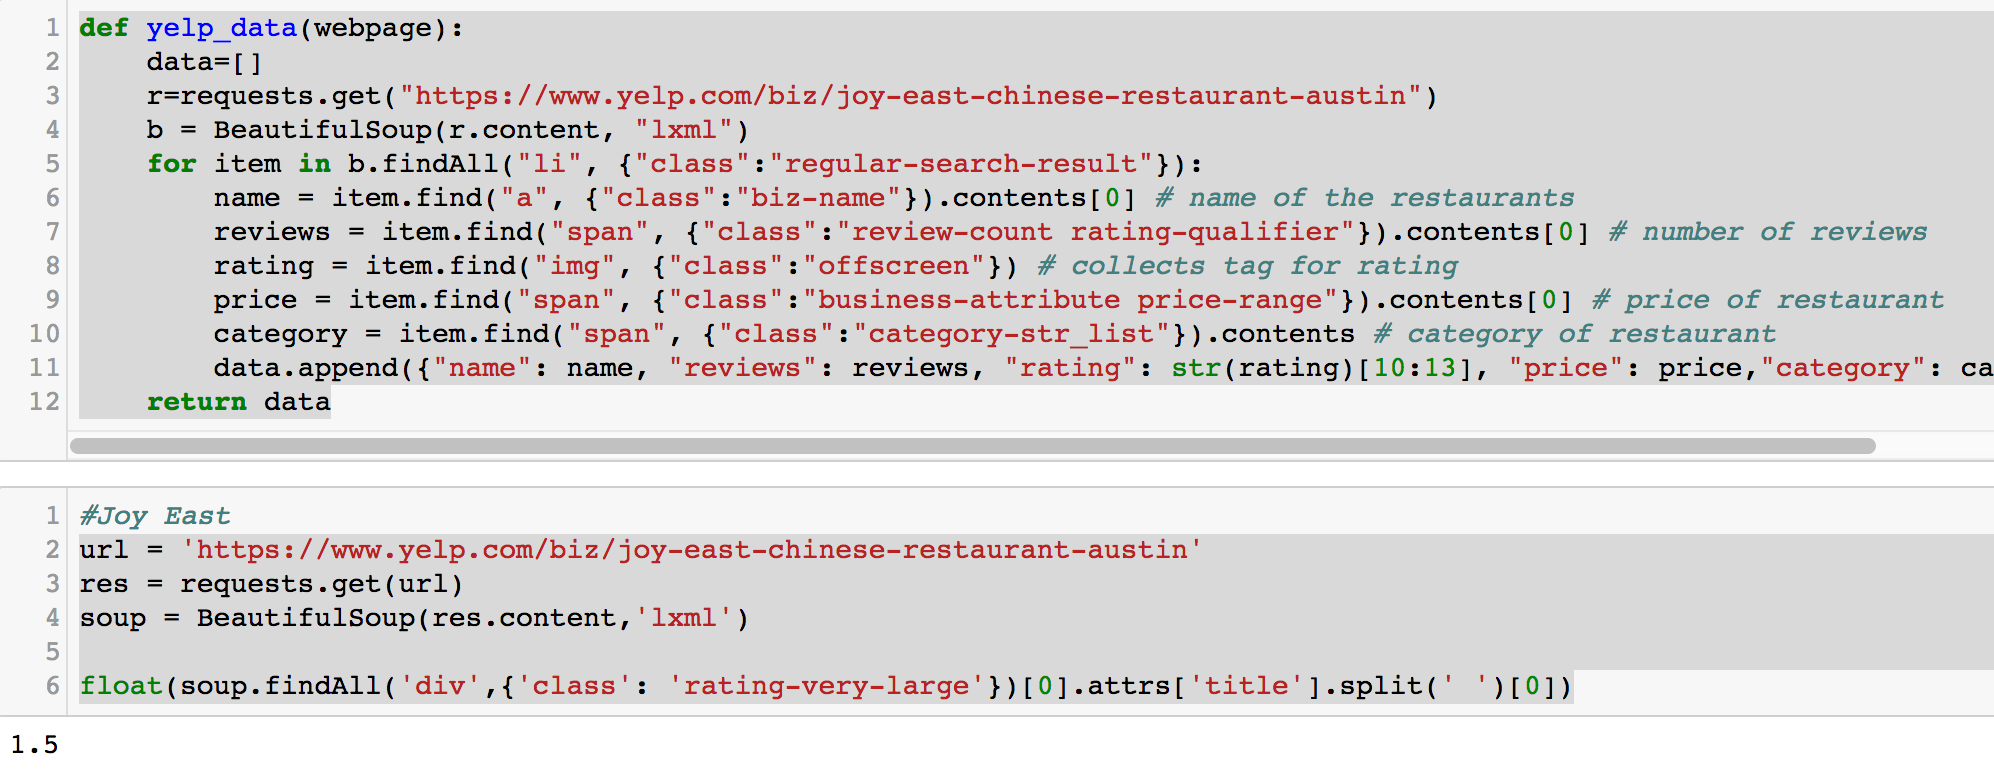

# The Google Map

I then used Gmap to create a Google map in my Jupyter Notebook to plug in the worst restaurants.  I set markets to name the restaurant, how many inspections they failed, and what their yelp review was.

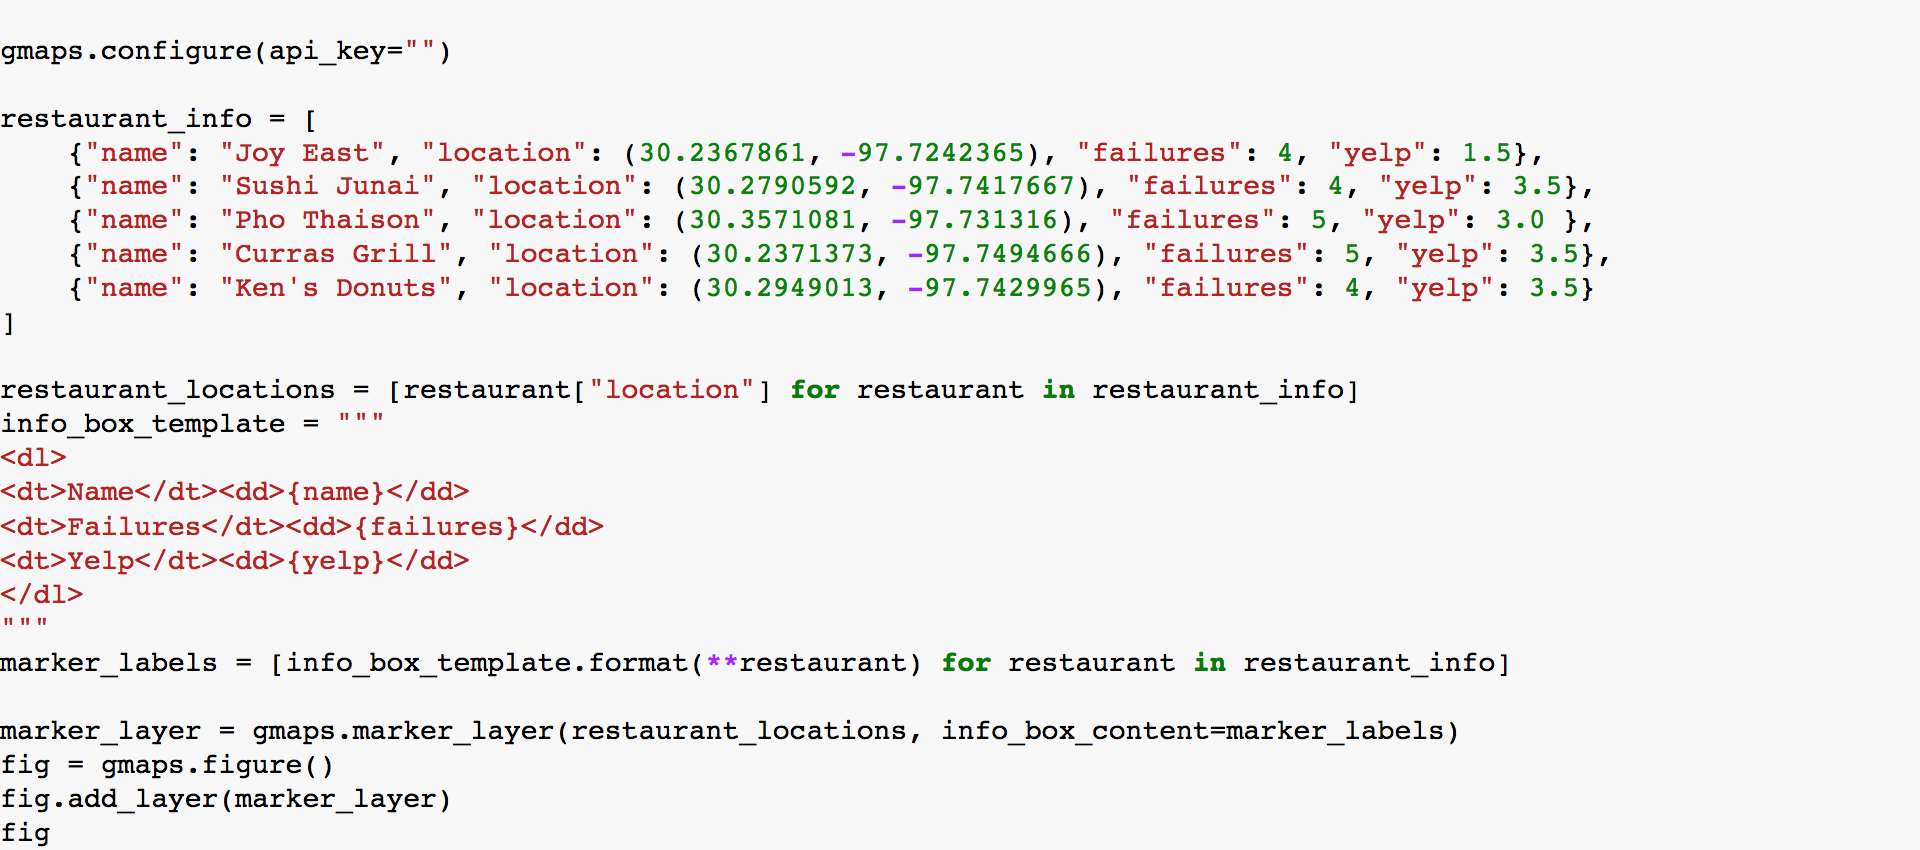

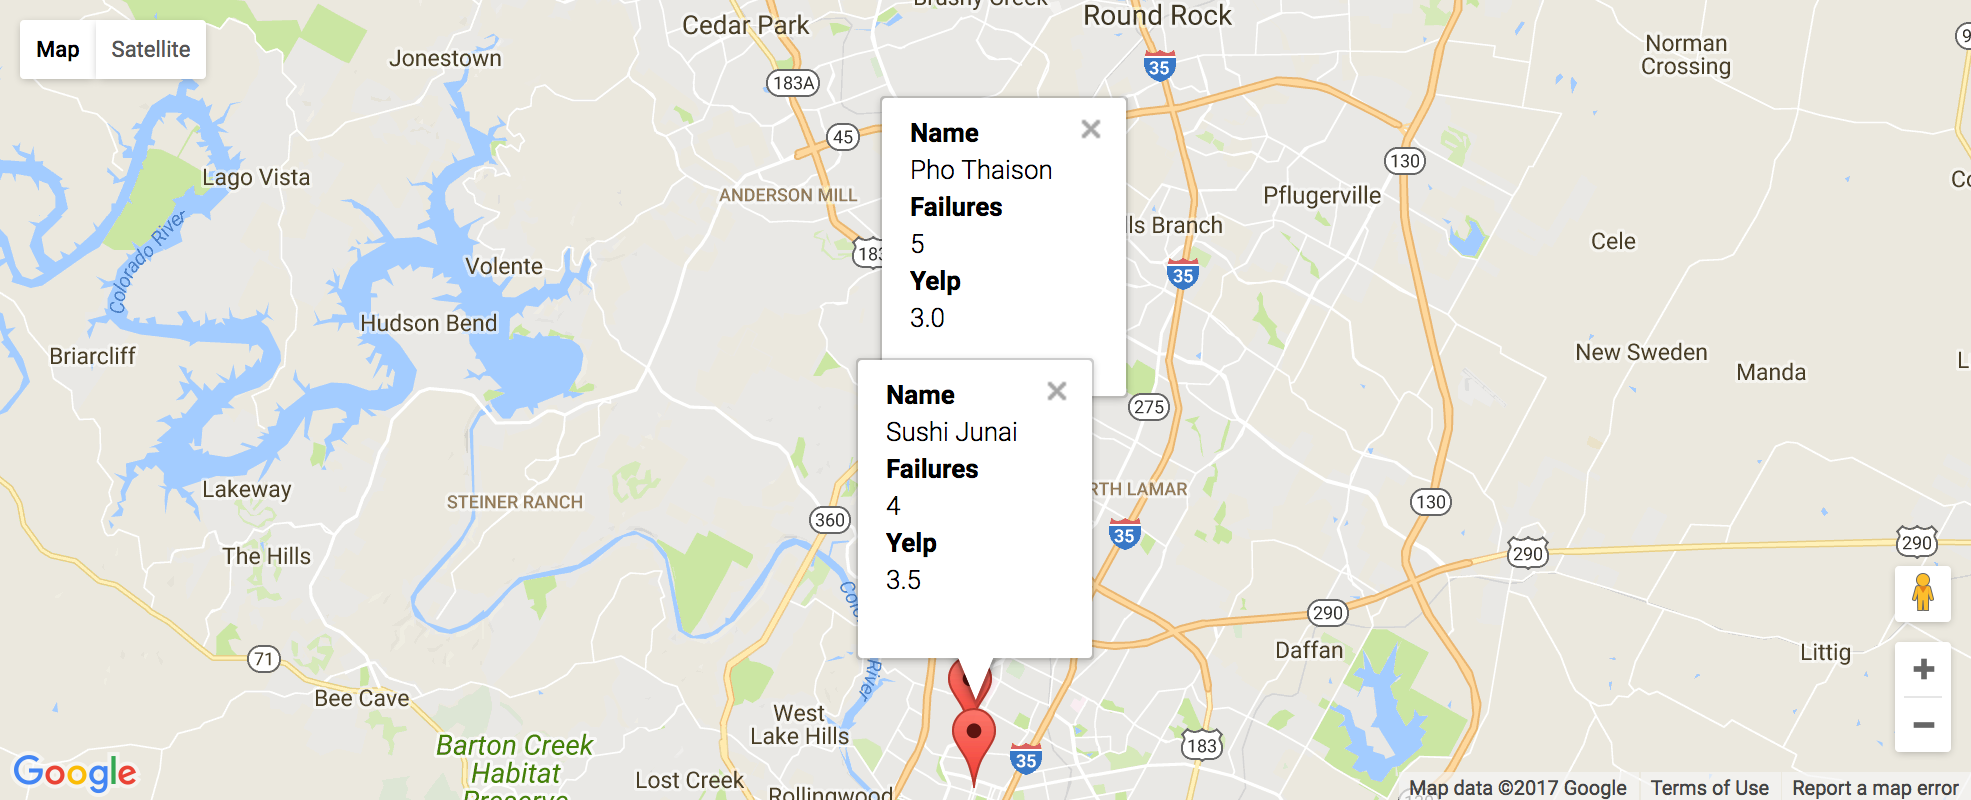

# The Conclusion

A challenging but fun capstone for me.  I wasn't sure I could do web scrapping or plug in a map, but I did!  Also I found the modeling to be very fun.  I tried many different models out of curiosity to see what my mean square error would be.  It became a game just to see what would happen by using ensemble methods and straight up regressor models.  

I feel with the mean square errors coming up close to zero (off by 5 points) that my prediction is pretty accurate: a food facility has a keen chance of repeating history in their inspections.  If you keep failing inspections, chances are you'll keep failing in the future; same if you keep passing. Whatever the majority of your inspections are, be they pass or fail, the chances of you repeating history are pretty good.  Also, eater beware to those organizations with chronic failing scores . . . unless you want a case of food poisoning.
